In [1]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import img_to_array
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re
from keras.models import Sequential, load_model
from keras import layers
from keras import optimizers
from keras import callbacks 
from tensorflow import expand_dims

In [2]:
folder_path = '../storage/dataSet'

In [3]:
default_image_size = tuple((256, 256))

In [4]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [6]:
image_list, label_list = [], []

try:
    print("[INFO] Loading images ...")
    root_dir = listdir(folder_path)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{folder_path}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{folder_path}/{plant_folder}/{plant_disease_folder}/")

            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:200]:
                image_directory = f"{folder_path}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Corn___Northern_Leaf_Blight ...
[INFO] Processing Pepper,_bell___healthy ...
[INFO] Processing Potato___healthy ...
[INFO] Processing Corn___healthy ...
[INFO] Processing Grape___Black_rot ...
[INFO] Processing Corn___Cercospora_leaf_spot Gray_leaf_spot ...
[INFO] Processing Apple___Apple_scab ...
[INFO] Processing Tomato___Spider_mites Two-spotted_spider_mite ...
[INFO] Processing Tomato___Late_blight ...
[INFO] Processing Strawberry___Leaf_scorch ...
[INFO] Processing Apple___Cedar_apple_rust ...
[INFO] Processing Tomato___Tomato_Yellow_Leaf_Curl_Virus ...
[INFO] Processing Apple___healthy ...
[INFO] Processing Grape___Leaf_blight_(Isariopsis_Leaf_Spot) ...
[INFO] Processing Tomato___Early_blight ...
[INFO] Processing Raspberry___healthy ...
[INFO] Processing Peach___healthy ...
[INFO] Processing Cherry___healthy ...
[INFO] Processing Blueberry___healthy ...
[INFO] Processing Background_without_leaves ...
[INFO] Processing Potato___Late_bli

In [7]:
image_size = len(image_list)

In [8]:
image_size

7800

In [9]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

print(label_binarizer.classes_)

['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Background_without_leaves' 'Blueberry___healthy'
 'Cherry___Powdery_mildew' 'Cherry___healthy'
 'Corn___Cercospora_leaf_spot Gray_leaf_spot' 'Corn___Common_rust'
 'Corn___Northern_Leaf_Blight' 'Corn___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' 'Tomato___Tom

In [10]:
pickle.dump(label_list, open('label_list.pkl', 'wb'))

In [9]:
pickle.dump(image_labels, open('image_labels.pkl', 'wb'))

In [8]:
np_image_list = np.array(image_list, dtype=np.float64)

In [13]:
np.savez_compressed('complete_img_to_array', complete_img_to_array=np_image_list)

In [5]:
image_labels = pickle.load(open('image_labels.pkl', 'rb'))

In [6]:
np_image_list = np.load('complete_img_to_array.npz')['arr_0']

In [7]:
print(np_image_list.shape)

(7800, 256, 256, 3)


In [8]:
print("[INFO] Spliting data to train,valid and test")
X_train, X_test_valid, y_train, y_test_valid = train_test_split(np_image_list[:3900], image_labels[:3900], train_size = 0.7, random_state = 1)
X_valid, X_test, y_valid, y_test = train_test_split(X_test_valid, y_test_valid, train_size = 0.33, random_state = 1)
print("[INFO] Done")

[INFO] Spliting data to train,valid and test
[INFO] Done


In [10]:
print("[INFO] Spliting data to train,valid and test")
X_train, X_test_valid, y_train, y_test_valid = train_test_split(np_image_list[3900:], image_labels[3900:], train_size = 0.7, random_state = 1)
X_valid, X_test, y_valid, y_test = train_test_split(X_test_valid, y_test_valid, train_size = 0.33, random_state = 1)
print("[INFO] Done")

[INFO] Spliting data to train,valid and test
[INFO] Done


In [9]:
np.savez_compressed('np_image_array_1',X_train=X_train, X_valid=X_valid, X_test=X_test, y_train=y_train, y_valid=y_valid, y_test=y_test)

In [11]:
np.savez_compressed('np_image_array_2',X_train=X_train, X_valid=X_valid, X_test=X_test, y_train=y_train, y_valid=y_valid, y_test=y_test)

In [5]:
print("[INFO] Loading and Concatenating the Data")
np_image_array_1 = np.load('np_image_array_1.npz')
np_image_array_2 = np.load('np_image_array_2.npz')

X_train = np.concatenate((np_image_array_1['X_train'], np_image_array_2['X_train']))
X_valid = np.concatenate((np_image_array_1['X_valid'], np_image_array_2['X_valid']))
X_test = np.concatenate((np_image_array_1['X_test'], np_image_array_2['X_test']))

y_train = np.concatenate((np_image_array_1['y_train'], np_image_array_2['y_train']))
y_valid = np.concatenate((np_image_array_1['y_valid'], np_image_array_2['y_valid']))
y_test = np.concatenate((np_image_array_1['y_test'], np_image_array_2['y_test']))
print("[INFO] Done")

[INFO] Loading and Concatenating the Data
[INFO] Done


In [7]:
np.savez_compressed('final_arrays', X_train=X_train, X_valid=X_valid, X_test=X_test, y_train=y_train, y_valid=y_valid, y_test=y_test)

In [5]:
print("[INFO] Final Loading of Data")
final_arrays = np.load('final_arrays.npz')
X_train = final_arrays['X_train']
X_valid = final_arrays['X_valid']
X_test = final_arrays['X_test']

y_train = final_arrays['y_train']
y_valid = final_arrays['y_valid']
y_test = final_arrays['y_test']
print("[INFO] Done")

[INFO] Final Loading of Data
[INFO] Done


In [6]:
label_binarizer = LabelBinarizer()
label_list = pickle.load(open('label_list.pkl', 'rb'))
label_binarizer.fit_transform(label_list)
n_classes = len(label_binarizer.classes_)

In [7]:
width=256
height=256
depth=3

model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 85, 85, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        1

In [9]:
checkpoint_path = '../storage/model.hdf5'

checkpoint = callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                       monitor='val_categorical_accuracy',
                                       verbose=1, 
                                       save_best_only=True,
                                       mode='max')

In [10]:
model.compile(optimizer='RMSprop',
              loss='CategoricalCrossentropy',
              metrics='CategoricalAccuracy')

In [13]:
history = model.fit(
    X_train, y_train, batch_size=32,
    validation_data=(X_valid, y_valid),
    steps_per_epoch=len(X_train) // 32,
    epochs=30,callbacks = [checkpoint]
    )

checkpoint_path = '../storage/model.hdf5'
model = load_model(checkpoint_path)

2022-12-06 05:37:43.686427: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 4293918720 exceeds 10% of free system memory.
2022-12-06 05:37:48.706660: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 4293918720 exceeds 10% of free system memory.


Epoch 1/30
170/170 [==============================] - ETA: 0s - loss: 2.4460 - categorical_accuracy: 0.4011
Epoch 1: val_categorical_accuracy improved from -inf to 0.26684, saving model to ../storage/model.hdf5
170/170 [==============================] - 52s 280ms/step - loss: 2.4460 - categorical_accuracy: 0.4011 - val_loss: 8.1271 - val_categorical_accuracy: 0.2668
Epoch 2/30
170/170 [==============================] - ETA: 0s - loss: 1.2456 - categorical_accuracy: 0.6444
Epoch 2: val_categorical_accuracy improved from 0.26684 to 0.46373, saving model to ../storage/model.hdf5
170/170 [==============================] - 41s 234ms/step - loss: 1.2456 - categorical_accuracy: 0.6444 - val_loss: 3.2975 - val_categorical_accuracy: 0.4637
Epoch 3/30
170/170 [==============================] - ETA: 0s - loss: 0.8221 - categorical_accuracy: 0.7498
Epoch 3: val_categorical_accuracy did not improve from 0.46373
170/170 [==============================] - 35s 205ms/step - loss: 0.8221 - categorical_a

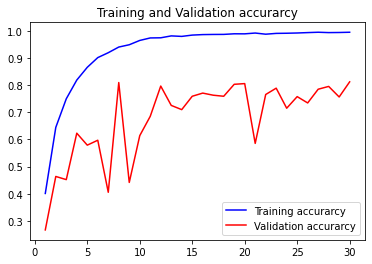

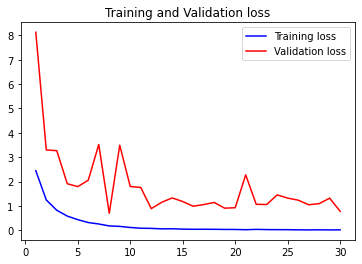

In [14]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [15]:
print("[INFO] Calculating model accuracy on Validation Data")
scores = model.evaluate(X_valid, y_valid)
print(f"Validation Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy on Validation Data
25/25 [==============================] - 1s 45ms/step - loss: 0.7791 - categorical_accuracy: 0.8122
Validation Accuracy: 81.21761679649353


In [18]:
print("[INFO] Calculating model accuracy on Testing Data")
scores = model.evaluate(X_test, y_test)
print(f"Testing Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy on Testing Data
49/49 [==============================] - 2s 47ms/step - loss: 0.7467 - categorical_accuracy: 0.8412
Testing Accuracy: 84.1198980808258


In [11]:
def convert_img(img):
    if img.endswith(".jpg") == True or img.endswith(".JPG") == True:
        image = convert_image_to_array(img)
        return np.array(image, np.float64)
    else :
        print("[INFO] Input file not in .jpg/.JPG Format..")

In [21]:
img = convert_image_to_array('test.jpg')
img = np.array(img, np.float64)
print(img.shape)
img = expand_dims(img, axis = 0)
print(img.shape)
result = model.predict(img)
result = np.array(result, np.float64)

itemindex = np.where(result==np.max(result))
itemindex[1][0]

(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 42ms/step


6

In [27]:
a = cv2.imread('a.JPG')
print(a.shape)
a = np.array(a, np.float64)
print(a.shape)
a = expand_dims(a, axis = 0)
print(a.shape)
result = model.predict(a)
result = np.array(result, np.float64)

itemindex = np.where(result==np.max(result))
print("probability:"+str(np.max(result))+"\n"+label_binarizer.classes_[itemindex[1][0]])

(256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 224ms/step
probability:0.9725133180618286
Apple___Cedar_apple_rust


In [13]:
print("[INFO] Loading Model")
checkpoint_path = '../storage/model.hdf5'
model = load_model(checkpoint_path)
print("[INFO] Done")

[INFO] Loading Model
[INFO] Done
